# Tutorial: optimal piecewise binning with continuous target

## Basic

To get us started, let's load a well-known dataset from the UCI repository and transform the data into a ``pandas.DataFrame``.

In [1]:
import pandas as pd
from sklearn.datasets import load_boston

In [2]:
data = load_boston()
df = pd.DataFrame(data.data, columns=data.feature_names)

We choose a variable to discretize and the continuous target.

In [3]:
variable = "LSTAT"
x = df[variable].values
y = data.target

Import and instantiate an ``ContinuousOptimalPWBinning`` object class and we pass the variable name. The ``ContinuousOptimalPWBinning`` can **ONLY** handle numerical variables. This differs from the ``ContinuousOptimalBinning`` object class.

In [4]:
from optbinning import ContinuousOptimalPWBinning

In [5]:
optb = ContinuousOptimalPWBinning(name=variable)

We fit the optimal binning object with arrays ``x`` and ``y``.

In [6]:
optb.fit(x, y)

ContinuousOptimalPWBinning(name='LSTAT')

You can check if an optimal solution has been found via the ``status`` attribute:

In [7]:
optb.status

'OPTIMAL'

You can also retrieve the optimal split points via the ``splits`` attribute:

In [8]:
optb.splits

array([ 4.6500001 ,  5.49499989,  6.86500001,  9.7249999 , 11.67499971,
       13.0999999 , 16.08500004, 19.89999962, 23.31500053])

#### The binning table

The optimal binning algorithms return a binning table; a binning table displays the binned data and several metrics for each bin. Class ``ContinuousOptimalPWBinning`` returns an object ``PWContinuousBinningTable`` via the ``binning_table`` attribute.

In [9]:
binning_table = optb.binning_table

In [10]:
type(binning_table)

optbinning.binning.piecewise.binning_statistics.PWContinuousBinningTable

The `binning_table` is instantiated, but not built. Therefore, the first step is to call the method `build`, which returns a ``pandas.DataFrame``.

In [11]:
binning_table.build()

,Bin,Count,Count (%),Sum,Std,Min,Max,Zeros count,c0,c1
0,"(-inf, 4.65)",50,0.098814,1985.9,8.198651,22.8,50.0,0,56.750078,-4.823690
1,"[4.65, 5.49)",28,0.055336,853.2,6.123541,21.9,50.0,0,74.546279,-8.650830
2,"[5.49, 6.87)",45,0.088933,1188.6,5.136259,20.6,48.8,0,27.338265,-0.059744
3,"[6.87, 9.72)",89,0.175889,2274.9,6.845250,11.9,50.0,0,35.670910,-1.273531
4,"[9.72, 11.67)",49,0.096838,1057.9,2.994842,15.0,31.0,0,36.084157,-1.316024
5,"[11.67, 13.10)",35,0.069170,697.5,2.592139,14.5,27.9,0,20.719580,-0.000000
6,"[13.10, 16.09)",66,0.130435,1289.9,3.541705,10.2,30.7,0,36.325829,-1.191317
7,"[16.09, 19.90)",69,0.136364,1129.3,3.607949,8.3,27.5,0,25.801457,-0.537020
8,"[19.90, 23.32)",28,0.055336,368.4,3.912839,5.0,21.7,0,32.669942,-0.882170
9,"[23.32, inf)",47,0.092885,556.0,4.006586,5.0,23.7,0,13.271245,-0.050143


Let's describe the columns of this binning table:

- Bin: the intervals delimited by the optimal split points.
- Count: the number of records for each bin.
- Count (%): the percentage of records for each bin.
- Sum: the target sum for each bin.
- Std: the target std for each bin.
- Min: the target min value for each bin.
- Max: the target max value for each bin.
- Zeros count: the number of zeros for each bin.
- $c_0$: the first coefficient of the prediction polynomial.
- $c_1$: the second coefficient of the prediction polynomial.

The  for bin $i$ is defined as $P_i = c_0 + c_1 x_i$, where $x_i \in \text{Bin}_{i}$. In general,
\begin{equation}
P_i = \sum_{j=0}^d c_j x_i^j,
\end{equation}
where $d$ is the degree of the event rate polynomial.

The last row shows the total number of records, sum and mean.

You can use the method ``plot`` to visualize the histogram and mean curve.

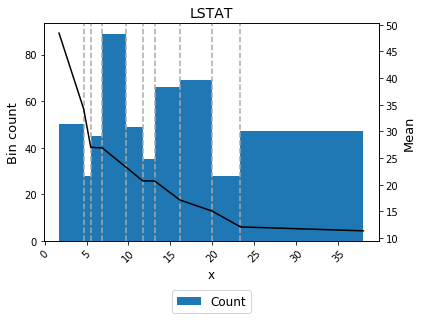

In [12]:
binning_table.plot()

##### Mean transformation

Now that we have checked the binned data, we can transform our original data into mean values.

In [13]:
x_transform_mean = optb.transform(x)

## Advanced

Many of the advanced options have been covered in the previous tutorials with a binary target. **Check it out!** In this section, we focus on the mean monotonicity trend and the mean difference between bins.

#### Binning table statistical analysis

The ``analysis`` method performs a statistical analysis of the binning table, computing the Information Value (IV) and Herfindahl-Hirschman Index (HHI). Additionally, several statistical significance tests between consecutive bins of the contingency table are performed using the Student's t-test. The piecewise binning also includes several performance metrics for regression problems.

In [14]:
binning_table.analysis()

-------------------------------------------------
OptimalBinning: Continuous Binning Table Analysis
-------------------------------------------------

  General metrics

    Mean absolute error              3.68295105
    Mean squared error              26.03331040
    Median absolute error            2.72954866
    Explained variance               0.69161991
    R^2                              0.69161991
    MPE                             -0.05213932
    MAPE                             0.17801859
    SMAPE                            0.08405929
    MdAPE                            0.13009259
    SMdAPE                           0.06660004
    HHI                              0.11313253
    HHI (normalized)                 0.03250821
    Quality score                    0.21464367

  Significance tests

    Bin A  Bin B  t-statistic      p-value
        0      1     5.644492 3.313748e-07
        1      2     2.924528 5.175586e-03
        2      3     0.808313 4.206096e-01
        3  

#### Mean monotonicity

The monotonic_trend option permits forcing a monotonic trend to the mean curve. The default setting “auto” should be the preferred option, however, some business constraints might require to impose different trends. The default setting “auto” chooses the monotonic trend most likely to minimize the L1-norm from the options “ascending”, “descending”, “peak” and “valley” using a machine-learning-based classifier.

In [15]:
variable = "INDUS"
x = df[variable].values
y = data.target

In [16]:
optb = ContinuousOptimalPWBinning(name=variable, monotonic_trend="auto")
optb.fit(x, y)

ContinuousOptimalPWBinning(name='INDUS')

In [17]:
binning_table = optb.binning_table
binning_table.build()

,Bin,Count,Count (%),Sum,Std,Min,Max,Zeros count,c0,c1
0,"(-inf, 3.35)",63,0.124506,1994.0,8.569841,16.5,50.0,0,31.428209,-0.000000
1,"[3.35, 5.04)",57,0.112648,1615.2,8.072710,17.2,50.0,0,42.928218,-3.432839
2,"[5.04, 6.66)",66,0.130435,1723.7,7.879078,16.0,50.0,0,25.626711,0.000000
3,"[6.66, 8.01)",31,0.061265,692.0,4.604886,14.4,35.2,0,52.694010,-4.064159
4,"[8.01, 16.57)",100,0.197628,2045.5,3.547348,11.9,28.7,0,21.858675,-0.212150
5,"[16.57, 18.84)",132,0.260870,2165.3,8.507336,5.0,50.0,0,21.603058,-0.196723
6,"[18.84, inf)",57,0.112648,1165.9,9.519086,7.0,50.0,0,17.896791,0.000000
7,Special,0,0.000000,0.0,NaN,NaN,NaN,0,0.000000,0.000000
8,Missing,0,0.000000,0.0,NaN,NaN,NaN,0,0.000000,0.000000
Totals,,506,1.000000,11401.6,,5.0,50.0,0,-,-


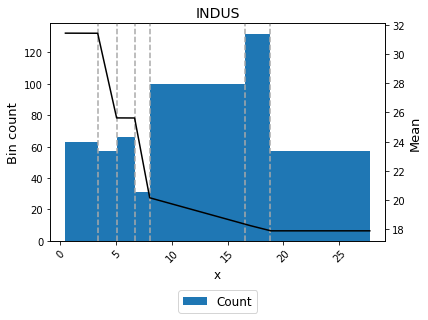

In [18]:
binning_table.plot()

In [19]:
binning_table.analysis()

-------------------------------------------------
OptimalBinning: Continuous Binning Table Analysis
-------------------------------------------------

  General metrics

    Mean absolute error              5.38628982
    Mean squared error              59.01564719
    Median absolute error            4.02296554
    Explained variance               0.30092446
    R^2                              0.30092446
    MPE                             -0.12086396
    MAPE                             0.27859705
    SMAPE                            0.12156690
    MdAPE                            0.18811572
    SMdAPE                           0.09658000
    HHI                              0.16875752
    HHI (normalized)                 0.06485221
    Quality score                    0.74831364

  Significance tests

    Bin A  Bin B  t-statistic  p-value
        0      1     2.180865 0.031181
        1      2     1.537968 0.126745
        2      3     2.976660 0.003739
        3      4     2.0752

A smoother curve, keeping the valley monotonicity, can be achieved by using ``monotonic_trend="convex"``.

In [20]:
optb = ContinuousOptimalPWBinning(name=variable, monotonic_trend="convex")
optb.fit(x, y)

ContinuousOptimalPWBinning(monotonic_trend='convex', name='INDUS')

In [21]:
binning_table = optb.binning_table
binning_table.build()

,Bin,Count,Count (%),Sum,Std,Min,Max,Zeros count,c0,c1
0,"(-inf, 3.35)",63,0.124506,1994.0,8.569841,16.5,50.0,0,35.478615,-1.760813
1,"[3.35, 5.04)",57,0.112648,1615.2,8.072710,17.2,50.0,0,35.478615,-1.760813
2,"[5.04, 6.66)",66,0.130435,1723.7,7.879078,16.0,50.0,0,35.478615,-1.760813
3,"[6.66, 8.01)",31,0.061265,692.0,4.604886,14.4,35.2,0,35.478615,-1.760813
4,"[8.01, 16.57)",100,0.197628,2045.5,3.547348,11.9,28.7,0,24.492313,-0.388383
5,"[16.57, 18.84)",132,0.260870,2165.3,8.507336,5.0,50.0,0,18.898426,-0.050792
6,"[18.84, inf)",57,0.112648,1165.9,9.519086,7.0,50.0,0,18.898426,-0.050792
7,Special,0,0.000000,0.0,NaN,NaN,NaN,0,0.000000,0.000000
8,Missing,0,0.000000,0.0,NaN,NaN,NaN,0,0.000000,0.000000
Totals,,506,1.000000,11401.6,,5.0,50.0,0,-,-


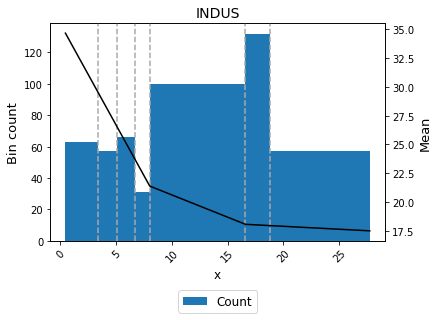

In [22]:
binning_table.plot()

In [23]:
binning_table.analysis()

-------------------------------------------------
OptimalBinning: Continuous Binning Table Analysis
-------------------------------------------------

  General metrics

    Mean absolute error              5.46871836
    Mean squared error              60.47066184
    Median absolute error            4.02086478
    Explained variance               0.28368894
    R^2                              0.28368894
    MPE                             -0.12278289
    MAPE                             0.28138163
    SMAPE                            0.12314489
    MdAPE                            0.19095659
    SMdAPE                           0.09398799
    HHI                              0.16875752
    HHI (normalized)                 0.06485221
    Quality score                    0.74831364

  Significance tests

    Bin A  Bin B  t-statistic  p-value
        0      1     2.180865 0.031181
        1      2     1.537968 0.126745
        2      3     2.976660 0.003739
        3      4     2.0752